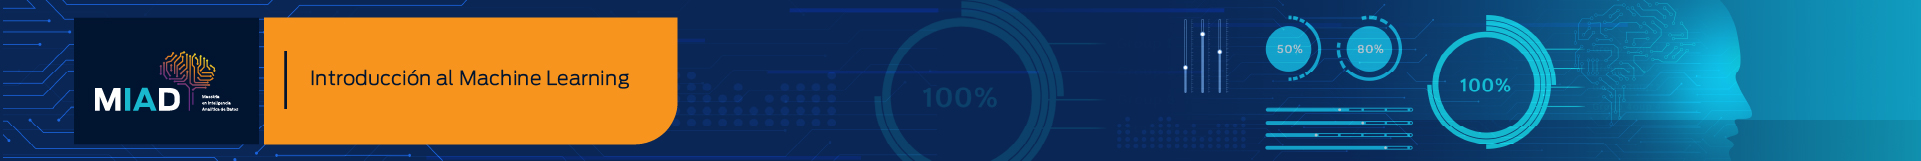

# Introducción al Machine Learning - Semana 6
## Caso: implementación de metodologías de imputación de variables e imbalanceo de clases


### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para gestionar situaciones de datos faltantes e imbalanceo de clases.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Primer conjunto de datos

Utilice el archivo de datos "Missing data.csv" que se encuentra en este repositorio para hacer los siguientes tres puntos:

### 1. Análisis preliminar de variables del primer conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el primer conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [3]:
Missing=pd.read_csv("MissingData.csv")
Missing.head()

,Class,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,seed.tmt,...,int.discolor,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

### 2. Gestión de datos faltantes (25 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Con la muestra de entrenamiento, realicen un procedimiento de imputación simple multivariada para todas las variables que tengan datos faltantes en sus filas.

In [5]:
XTotal = Missing.loc[:,Missing.columns!="Class"]
yTotal = Missing.loc[:,Missing.columns=="Class"]

particiones correspondientes para que el 80% correspondan al conjunto de entrenamiento y los restantes al conjunto de evaluación

In [6]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

porcentaje = 0.8  # 80% de los datos para entrenamiento

datosTrain = round(len(XTotal) * porcentaje)

XTrain = XTotal.head(datosTrain)
yTrain = yTotal.head(datosTrain)

XTest = XTotal.tail(len(XTotal) - datosTrain)
yTest = yTotal.tail(len(yTotal) - datosTrain)


Consulta de valores faltantes

In [7]:
faltantes = XTotal.isnull().sum()
columnas_con_faltantes = faltantes[faltantes > 0]

print(columnas_con_faltantes)


date                 1
plant.stand         36
precip              38
temp                30
hail               121
crop.hist           16
area.dam             1
sever              121
seed.tmt           121
germ               112
plant.growth        16
leaf.halo           84
leaf.marg           84
leaf.size           84
leaf.shread        100
leaf.malf           84
leaf.mild          108
stem                16
lodging            121
stem.cankers        38
canker.lesion       38
fruiting.bodies    106
ext.decay           38
mycelium            38
int.discolor        38
sclerotia           38
fruit.pods          84
fruit.spots        106
seed                92
mold.growth         92
seed.discolor      106
seed.size           92
shriveling         106
roots               31
dtype: int64


Se aplica el metodo de Imputación multivariada

In [8]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(XTrain)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(random_state=0)

Se obtiene la matriz de datos de entrenamiento imputados

In [31]:
XTrainImputado=pd.DataFrame(imp.transform(XTrain))
print(XTrainImputado)

      0    1    2    3    4    5    6    7    8    9   ...   25   26   27  \
0    6.0  0.0  2.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
1    4.0  0.0  2.0  1.0  0.0  2.0  0.0  2.0  1.0  1.0  ...  0.0  0.0  0.0   
2    3.0  0.0  2.0  1.0  0.0  1.0  0.0  2.0  1.0  2.0  ...  0.0  0.0  0.0   
3    3.0  0.0  2.0  1.0  0.0  1.0  0.0  2.0  0.0  1.0  ...  0.0  0.0  0.0   
4    6.0  0.0  2.0  1.0  0.0  2.0  0.0  1.0  0.0  2.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
541  3.0  1.0  1.0  2.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
542  4.0  1.0  1.0  2.0  0.0  1.0  2.0  0.0  1.0  1.0  ...  0.0  0.0  0.0   
543  2.0  1.0  1.0  2.0  0.0  3.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  0.0   
544  4.0  1.0  1.0  2.0  0.0  1.0  3.0  0.0  1.0  1.0  ...  0.0  0.0  0.0   
545  6.0  0.0  2.0  2.0  0.0  2.0  2.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   

      28   29   30   31   32   33   34  
0    4.0  0.0  0.0  0.0  0.0  0.0 

Se obtiene la matriz de datos imputados bajo el mismo criterio anterior pero para la matriz de test

In [32]:
XTestImputado=pd.DataFrame(imp.transform(XTest))
print(XTestImputado)

      0         1         2         3         4         5    6         7   \
0    5.0  0.000000  2.000000  2.000000  0.000000  2.000000  2.0  1.000000   
1    6.0  1.000000  2.000000  2.000000  0.000000  2.000000  3.0  1.000000   
2    5.0  1.000000  2.000000  1.000000  0.000000  2.000000  2.0  0.000000   
3    6.0  0.000000  2.000000  1.000000  0.000000  3.000000  3.0  0.000000   
4    5.0  0.000000  2.000000  1.000000  0.000000  2.000000  2.0  0.000000   
..   ...       ...       ...       ...       ...       ...  ...       ...   
132  0.0  1.005689  0.975286  0.851755  0.415858  1.816397  2.0  1.163341   
133  0.0  1.000000  1.505478  0.000000  0.275707  0.000000  0.0  1.211104   
134  2.0  1.000000  1.536762  0.000000  0.266911  0.000000  0.0  1.064348   
135  0.0  1.000000  1.790732  0.000000  0.353533  1.000000  3.0  1.187756   
136  2.0  1.000000  1.822016  0.000000  0.344736  1.000000  3.0  1.041001   

           8         9   ...        25        26        27        28  \
0  

(Utilice este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación de modelo de clasificación (10 puntos)
Escojan un modelo de clasificación de los vistos en la semana 3 del curso e impleméntenlo. Evalúen su poder predictivo en la muestra de evaluación debidamente transformada, de acuerdo a la imputación hecha en el conjunto entrenamiento.

In [34]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

yTest_binary = np.where(yTest == 'Up', 1, 0)
nbc_model = GaussianNB()
nbc_model.fit(XTrainImputado, yTrain)
yPred_nbc = nbc_model.predict(XTestImputado)
y_prob_nbc = nbc_model.predict_proba(XTestImputado)[:, 1]



In [36]:
accuracy_nbc = accuracy_score(yTest, yPred_nbc)
conf_matrix_nbc = confusion_matrix(yTest, yPred_nbc)
classification_rep_nbc = classification_report(yTest, yPred_nbc)

fpr, tpr, _ = roc_curve(yTest_binary, y_prob_nbc)
roc_auc = auc(fpr, tpr)

In [39]:
# Mostrar métricas de evaluación
print(f'Exactitud (Accuracy) del modelo Naïve Bayes: {accuracy_nbc:.4f}\n')

print('Matriz de Confusión:')
print(conf_matrix_nbc)

print('\nReporte de Clasificación:')
print(classification_rep_nbc)


Exactitud (Accuracy) del modelo Naïve Bayes: 0.7737

Matriz de Confusión:
[[ 2  0  0  0  0  0  0  0 13]
 [ 0 48  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0]
 [ 0  6  5  0  0 35  0  5  0]
 [ 0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]

Reporte de Clasificación:
                             precision    recall  f1-score   support

               2-4-d-injury       1.00      0.13      0.24        15
        alternarialeaf-spot       0.89      0.96      0.92        50
                 brown-spot       0.00      0.00      0.00         0
              cyst-nematode       1.00      1.00      1.00         8
diaporthe-pod-&-stem-blight       1.00      1.00      1.00         9
         frog-eye-leaf-spot       1.00      0.69      0.81        51
           herbicide-injury       1.00      1.00      1.00         4
     phyllosticta-leaf-spot       0.00      0.00      0.00         0
      

El modelo de clasificación presenta un desempeño general aceptable, con una precisión ponderada de 0.96 y un recall ponderado de 0.77, lo que indica que la mayoría de las predicciones son correctas. Sin embargo, hay desafíos importantes que limitan su efectividad:

**Problema de clases no detectadas:** Algunas clases, como brown-spot y phyllosticta-leaf-spot, no son predichas en absoluto (recall = 0), lo que sugiere un fuerte desbalance de datos o que el modelo no ha aprendido bien las características de estas categorías.

**Desequilibrio en el rendimiento entre clases:** Mientras que algunas clases tienen alta precisión pero bajo recall (como 2-4-d-injury con precisión 1.00 y recall 0.13), otras presentan un mejor equilibrio pero siguen teniendo margen de mejora.

**Posible sesgo debido a datos desbalanceados:** El peso de las clases más representadas puede estar afectando la capacidad del modelo para identificar correctamente las clases menos frecuentes.

### Segundo conjunto de datos

Para los siguientes cinco puntos, utilice la base de datos "raw_df" que tiene información sobre tarjetas de crédito y se descarga con las siguientes líneas de código:

In [9]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 4. Análisis preliminar de variables del segundo conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el segundo conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
from sklearn.ensemble import RandomForestClassifier


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Implementación de QDA (10 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Una vez se ha hecho esto, calibren un modelo QDA con la muestra de entrenamiento y evalúen su poder predictivo en la muestra de evaluación.

In [48]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####
### Arreglo de la base para los ejercicios
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

yTotal = raw_df['Class']
XTotal = raw_df.drop(columns=['Class','Time'])
scaler = StandardScaler()
XTotal['Amount'] = scaler.fit_transform(XTotal[['Amount']])
### Se parte la base en TEST y TRAIN
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, stratify=yTotal, random_state=0)

In [49]:
clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain, yTrain)

QuadraticDiscriminantAnalysis()

In [50]:
prediccionesQDA=clfQDA.predict(XTest)
print(confusion_matrix(yTest,prediccionesQDA))
print(classification_report(yTest, prediccionesQDA, digits=4))


[[91576  2249]
 [   22   140]]
              precision    recall  f1-score   support

           0     0.9998    0.9760    0.9878     93825
           1     0.0586    0.8642    0.1098       162

    accuracy                         0.9758     93987
   macro avg     0.5292    0.9201    0.5488     93987
weighted avg     0.9981    0.9758    0.9862     93987



AUC: 0.9201


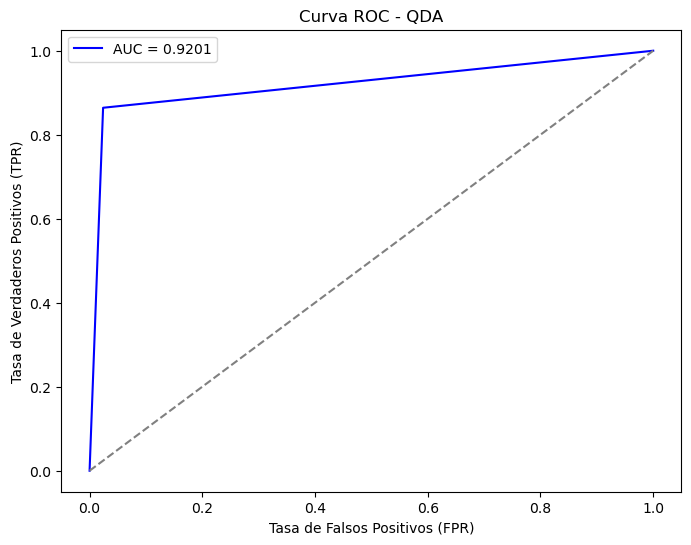

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calcular AUC
auc_qda = roc_auc_score(yTest, prediccionesQDA)
print(f'AUC: {auc_qda:.4f}')

# Obtener puntos de la curva ROC
fpr, tpr, _ = roc_curve(yTest, prediccionesQDA)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_qda:.4f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea base
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - QDA')
plt.legend()
plt.show()


El **QDA** no es la mejor opción para clasificar el posible fraude en tarjeta de crédito, ya que la clase fraude tiene muy pocas observaciones, lo que hace que la matriz de covarianza este mal definida. El modelo **QDA** realiza la clasificación con el desbalance de la variable objetivo, lo que hace las estimaciones aunque con un alto AUC, no sean correctas en el momento de evaluar el modelo

### 6. Gestión de imbalanceo de clases (25 puntos)
Realicen un procedimiento para gestionar las clases imbalanceadas de la base de datos con el conjunto de entrenamiento. 

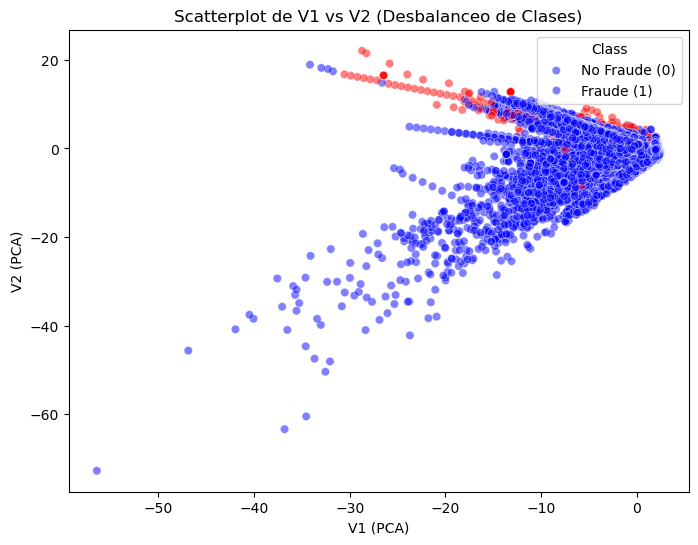

In [54]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=raw_df["V1"], y=raw_df["V2"], hue=raw_df["Class"], alpha=0.5, palette={0: "blue", 1: "red"})
plt.xlabel("V1 (PCA)")
plt.ylabel("V2 (PCA)")
plt.title("Scatterplot de V1 vs V2 (Desbalanceo de Clases)")
plt.legend(title="Class", labels=["No Fraude (0)", "Fraude (1)"])
plt.show()

Como se puede observar, el desbalanceo de clases es severo ya que la mayoria de puntos indican un NO FRAUDE (0) en la variable de clasificación.

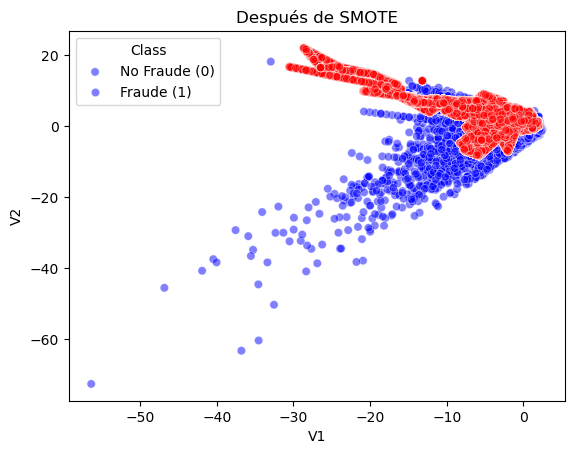

In [61]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()  #Smote con parámetros por default
X_train_res, y_train_res = sm.fit_resample(XTrain, yTrain)

df_resampled = pd.DataFrame(X_train_res, columns=raw_df.columns[:-1])  # Después de SMOTE
df_resampled["Class"] = y_train_res.values

sns.scatterplot(x=df_resampled["V1"], y=df_resampled["V2"], hue=df_resampled["Class"],
                alpha=0.5, palette={0: "blue", 1: "red"})
plt.title("Después de SMOTE")
plt.legend(title="Class", labels=["No Fraude (0)", "Fraude (1)"])


Como se observa en la gráfica anterior, se realiza el balanceo de la muestra por el método de SMOTE, donde se generan más datos de clasificación para la variable **CLASS**

### 7. Implementación de random forest (10 puntos)
Estimen un modelo random forest para predecir la variable de respuesta y midan su desempeño en la muestra de evaluación.

In [62]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 7 ####
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=0)

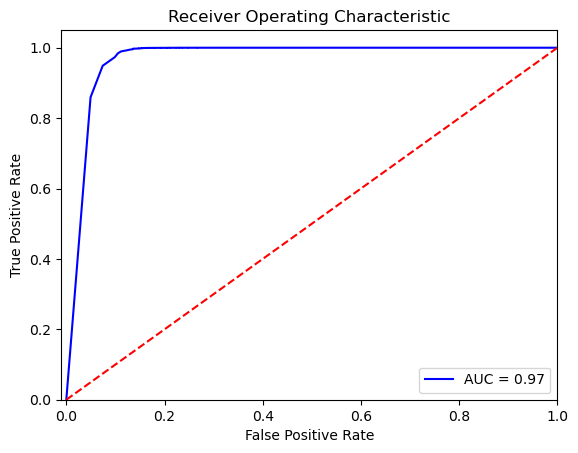

In [63]:
prediccionRF=clfRF.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)
AUCRF=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 7)

### 8. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los dos modelos estimados (QDA sin balancear y random forest balanceando) en este caso resulta mejor para la predicción de la variable de respuesta en la segunda base de datos? Justifiquen su respuesta.

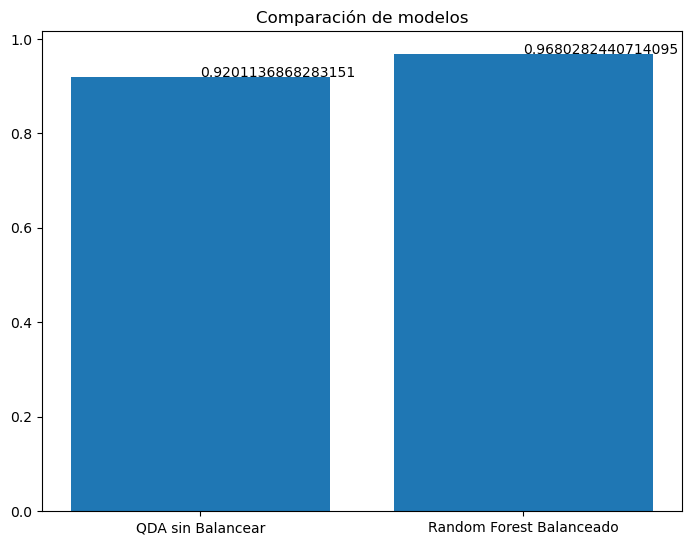

In [64]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['QDA sin Balancear','Random Forest Balanceado']
ejeY = [auc_qda,AUCRF]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

El modelo que mejor predice la variable de clasificación es el Random Forest Balanceado. Esto debido a que el QDA aunque tiene un buen AUC, este es resultado de predecir la variable de **NO FRAUDE** que es mayoritaria, pero el modelo no tiene la capacidad de predecir la clase de **FRAUDE**. El **RANDOM FOREST** con el balanceo de la respuesta, tiene más información para estimar la clase minoritaria, lo que le da una capacidad más alta para estimar esa caracteristica y aumentar el AUC de este modeo sobre el QDA.